In [1]:
import sys  
sys.path.insert(0, '/home/dfki/Desktop/Thesis/hyperopt')
import temp
import vector
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import random
from hyperopt import fmin, tpe, hp, STATUS_OK,Trials,trials_from_docs
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans,SpectralClustering,k_means
import random
import pickle
import numpy as np
import scipy
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df_31 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/31/final/df_31.p", "rb"))
print(df_31.shape)

(6660, 94)


In [3]:
#replace the facke None with real one 
df_31 = df_31.replace(['This_is_None'],[np.nan]) 
df_31.head()

,run_id,flow_id,accuracy,f_measure,area_under_roc_curve,average_cost,kappa,kb_relative_information_score,mean_absolute_error,mean_prior_absolute_error,...,mlpclassifier__nesterovs_momentum,mlpclassifier__power_t,mlpclassifier__shuffle,mlpclassifier__solver,mlpclassifier__tol,sgdclassifier__loss,sgdclassifier__penalty,sgdclassifier__alpha,sgdclassifier__max_iter,sgdclassifier__tol
0,1860342,5804,0.776,0.754060,0.796052,0.0,0.389978,181.018401,0.343548,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2083023,5804,0.759,0.740040,0.778186,0.0,0.356990,193.923482,0.335331,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2083110,5804,0.779,0.755662,0.805433,0.0,0.393524,200.287758,0.336776,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2083146,5804,0.774,0.753757,0.799705,0.0,0.389849,204.562090,0.333926,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2083157,5804,0.777,0.758590,0.798419,0.0,0.402465,207.310341,0.333511,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for i in range(len(df_31.columns)):
    print(i,df_31.columns[i])

0 run_id
1 flow_id
2 accuracy
3 f_measure
4 area_under_roc_curve
5 average_cost
6 kappa
7 kb_relative_information_score
8 mean_absolute_error
9 mean_prior_absolute_error
10 prior_entropy
11 relative_absolute_error
12 root_mean_prior_squared_error
13 root_mean_squared_error
14 root_relative_squared_error
15 classifier
16 randomforestclassifier__criterion
17 randomforestclassifier__max_depth
18 randomforestclassifier__min_samples_leaf
19 randomforestclassifier__min_samples_split
20 randomforestclassifier__min_weight_fraction_leaf
21 randomforestclassifier__max_features
22 randomforestclassifier__n_estimators
23 randomforestclassifier__oob_score
24 feature_preprocessing
25 pca__iterated_power
26 pca__n_components
27 pca__svd_solver
28 pca__tol
29 pca__whiten
30 data_preprocessing
31 ColumnTransformer__remainder
32 kernelpca__kernel
33 kernelpca__n_components
34 VarianceThreshold__threshold
35 decisiontreeclassifier__criterion
36 decisiontreeclassifier__max_depth
37 decisiontreeclassifier_

In [5]:
#remove complete None columns and impute the None values

df_31 = df_31.dropna(axis='columns', how='all')
print(df_31.shape) 


df_31["mlpclassifier__batch_size"].replace({"auto": 200}, inplace=True)
df_31["randomforestclassifier__max_features"].replace({"auto": np.sqrt(df_31.shape[1])}, inplace=True)


df_31.head()

(6660, 88)


,run_id,flow_id,accuracy,f_measure,area_under_roc_curve,average_cost,kappa,kb_relative_information_score,mean_absolute_error,mean_prior_absolute_error,...,mlpclassifier__n_iter_no_change,mlpclassifier__nesterovs_momentum,mlpclassifier__power_t,mlpclassifier__shuffle,mlpclassifier__solver,mlpclassifier__tol,sgdclassifier__loss,sgdclassifier__penalty,sgdclassifier__alpha,sgdclassifier__tol
0,1860342,5804,0.776,0.754060,0.796052,0.0,0.389978,181.018401,0.343548,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2083023,5804,0.759,0.740040,0.778186,0.0,0.356990,193.923482,0.335331,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2083110,5804,0.779,0.755662,0.805433,0.0,0.393524,200.287758,0.336776,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2083146,5804,0.774,0.753757,0.799705,0.0,0.389849,204.562090,0.333926,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2083157,5804,0.777,0.758590,0.798419,0.0,0.402465,207.310341,0.333511,0.42016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df5 = df_31[['accuracy','f_measure','classifier','data_preprocessing','feature_preprocessing']]
df5.head()

In [ ]:
df5.shape

In [ ]:
###########removed feature ############

#pca__n_components
#kernelpca__kernel
# kernelpca__n_components
# kneighborsClassifier__n_neighbors
# kneighborsClassifier__algorithm
# sgdclassifier__max_iter

In [ ]:
for i in range(len(df_31.columns)):
    print(i,df_31.columns[i])

In [6]:
df = temp.encoder(df_31)
df.head()

,run_id,flow_id,accuracy,f_measure,area_under_roc_curve,average_cost,kappa,kb_relative_information_score,mean_absolute_error,mean_prior_absolute_error,...,invscaling,False,True,False,True,adam,lbfgs,sgd,perceptron,l2
0,1860342,5804,0.776,0.754060,0.796052,0.0,0.389978,181.018401,0.343548,0.42016,...,0,0,0,0,0,0,0,0,0,0
1,2083023,5804,0.759,0.740040,0.778186,0.0,0.356990,193.923482,0.335331,0.42016,...,0,0,0,0,0,0,0,0,0,0
2,2083110,5804,0.779,0.755662,0.805433,0.0,0.393524,200.287758,0.336776,0.42016,...,0,0,0,0,0,0,0,0,0,0
3,2083146,5804,0.774,0.753757,0.799705,0.0,0.389849,204.562090,0.333926,0.42016,...,0,0,0,0,0,0,0,0,0,0
4,2083157,5804,0.777,0.758590,0.798419,0.0,0.402465,207.310341,0.333511,0.42016,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.values
X.shape

In [9]:
X =  df.iloc[:,2:].values
print(X.shape)

(6660, 121)


In [ ]:
df_31['DFC'] = df_31['data_preprocessing'] + df_31['feature_preprocessing']+ df_31['classifier']

In [ ]:
df = df_31.iloc[:,2:15]
df.head()

In [ ]:
pickle.dump(X, open('/home/dfki/Desktop/Thesis/hyperopt/result_openml/final_result/125923/X125923_f=67.p', 'wb'))

In [ ]:
for i in range(len(df.columns)):
    print(i,df.columns[i])

In [ ]:
df.to_csv('df_32_vector.csv', index=True) 

In [ ]:
random.seed(0)
sampling = random.choices(range(6642), k=50)
print(sampling)

## without evaluation features 

In [ ]:
df108 = df.iloc[:,15:]
# df69_50= df69.iloc[sampling]
# X = df69_50.values
X = df108.values
X.shape

In [8]:
X= df.values
X.shape

(6660, 123)

## with evaluation features

In [ ]:
#X = df_31.values

#X = df_31.iloc[sampling].values
#X.shape

(6660, 121)
Cluster_number
0    6610
1      50
Name: cluster_2, dtype: int64
---------------------------------------
Cluster_number
0    5345
1      50
2    1265
Name: cluster_3, dtype: int64
---------------------------------------
Cluster_number
0    5295
1      50
2    1265
3      50
Name: cluster_4, dtype: int64
---------------------------------------
Cluster_number
0    5295
1      50
2    1211
3      50
4      54
Name: cluster_5, dtype: int64
---------------------------------------
Cluster_number
0    5294
1      50
2    1211
3      50
4      54
5       1
Name: cluster_6, dtype: int64
---------------------------------------
Cluster_number
0    5294
1      50
2    1169
3      50
4      54
5       1
6      42
Name: cluster_7, dtype: int64
---------------------------------------
Cluster_number
0    5294
1      50
2    1113
3      50
4      54
5       1
6      42
7      56
Name: cluster_8, dtype: int64
---------------------------------------
Cluster_number
0    2321
1      50
2    111

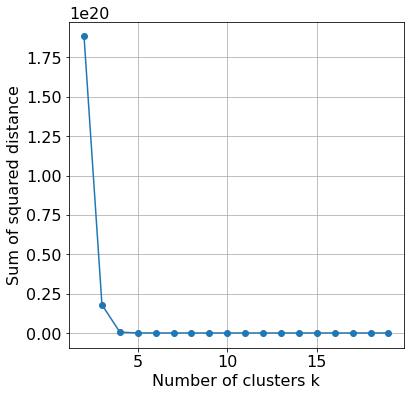

In [10]:
#find the best K    
SSE,CENTER,CLUSTER_MAP  = temp.find_best_k(X,20)

In [ ]:
SSE

In [ ]:
def Kmeans_trial_builder(X1,k,trial,method,min_member):
    # find the best K
    # Run the Kmeans algorithm and get the index of data points clusters
    
    def calculate_SSE_for_each_cluster(X,centers,cluster_map,k):
    biggest =[]
    for j in range(k):
        sum_dist = []
        l = np.where([cluster_map['cluster_{}'.format(k)] == j])[1]
        for i in l:
            dist = ((X[i] - centers[k][j])**2).sum()
            sum_dist.append(dist)
        print('sse for cluster {}: {}'.format(j,np.array(sum_dist).sum()))
        biggest.append(np.array(sum_dist).sum())
    sse = np.array(sum_dist).sum()
    
    print("k={}, sse={}".format(k,sse))
    print('Biggest sse is for cluster {}'.format(np.array(biggest).argmax()))
    return (np.array(biggest).argmax())
    
       
    
    
    sse = []
    centers = {}
    
    cluster_map1 = pd.DataFrame()
    cluster_map1['data_index'] = range(0, X1.shape[0])

    
    km = KMeans(n_clusters=k)
    km.fit(X1)
    sse.append(km.inertia_)
    centers[k] = km.cluster_centers_
    cluster_map1['cluster_{}'.format(k)] = km.labels_

    cluster_map1['Cluster_number'] = km.labels_
    aa = cluster_map1.groupby('Cluster_number').count()
    print(aa['cluster_{}'.format(k)])

    print("---------------------------------------")
    
    if method == 'biggest_cluster':
        biggest_cluster = cluster_map1.groupby('Cluster_number').count().idxmax()[0]
        l = np.where([cluster_map1['cluster_{}'.format(k)] == biggest_cluster])[1]
    elif method == 'biggest_sse':
        biggest_sse = calculate_SSE_for_each_cluster(X1,centers,cluster_map1,k)
        l = np.where([cluster_map1['cluster_{}'.format(k)] == biggest_sse])[1]
        
    elif method == 'all_cluster':
        l = temp.selecet_index_base_kmeans(X1,k,min_member)
    
    t = temp.specialindex_trial_builder(trial,l)

    return t

#### SSE
I have implimented the function calculate_SSE myself to check how sse claculated and the result are the same.

In [ ]:
import pylab as plb
plb.rcParams['font.size'] = 16
plt.figure(figsize=(6, 6))
plt.plot(range(2,20), np.log(SSE), '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.grid(True)


In [ ]:
def calculate_SSE(X,centers,cluster_map,maxk):
    for k in range(2,maxk):
        sum_dist = []
        for j in range(k):
            l = np.where([cluster_map['cluster_{}'.format(k)] == j])[1]
            for i in l:
                dist = ((X[i] - centers[k][j])**2).sum()
                sum_dist.append(dist)
        sse = np.array(sum_dist).sum()
        print("k={}, sse={}".format(k,sse))

In [ ]:
calculate_SSE(X,CENTER,CLUSTER_MAP,10)

In [ ]:
def calculate_SSE_for_each_cluster(X,centers,cluster_map,k):

    biggest =[]
    for j in range(k):
        sum_dist = []
        l = np.where([cluster_map['cluster_{}'.format(k)] == j])[1]
        for i in l:
            dist = ((X[i] - centers[k][j])**2).sum()
            sum_dist.append(dist)
        print('sse for cluster {}: {}'.format(j,np.array(sum_dist).sum()))
        biggest.append(np.array(sum_dist).sum())
    sse = np.array(sum_dist).sum()
    
    print("k={}, sse={}".format(k,sse))
    print(np.array(biggest).max())

In [ ]:
calculate_SSE_for_each_cluster(X,CENTER,CLUSTER_MAP,3)

In [ ]:
import pickle
experiment5 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/31/automatic/new/cluster/random_percentage.p", "rb"))
temp.expriment_ploter(experiment5,'random_percentage')

# insight to each cluster

In [ ]:
def cluter_report(X,cluster_map,maxk):
    for k in range(2,maxk):
        avg_acc =[]
        avg_f1 = []
        for j in range(k):
            l = np.where([cluster_map['cluster_{}'.format(k)] == j])[1]


#             print("k={}, cluster={},len={}, DFC={} ".format( k,j,len(l),set(df_31['DFC'][l])))
            print("k={}, cluster={},len={} ".format( k,j,len(l)))

            print("Data preprocessing:{}, Feature preprosser:{}, Classifier:{}".format(set(df_31['data_preprocessing'][l]),set(df_31['feature_preprocessing'][l]),set(df_31['classifier'][l])))

            print('max acc in cluster {} --- Min acc in cluster {}  ---- Mean acc{}'.format(df_31['accuracy'][l].max(),df_31['accuracy'][l].min(),df_31['accuracy'][l].mean()))
            print('index')
            print(l[0])
            print('------------------------------------')
        print("-------------------------------------------------------")

In [ ]:
temp.cluter_report(df_31,CLUSTER_MAP,15)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component1', 'component2'])
a = principalDf.values

fig, ax = plt.subplots()
ax.scatter(a[:,0],a[:,1])
plt.grid(True)

In [ ]:
g=np.where ((principalDf['component1']>1.5)&(principalDf['component1']<2.5) & (principalDf['component2']> -0.25)& (principalDf['component2']< 0.25))
len(list(g[0]))

In [ ]:
sampling = random.sample(list(g[0]), 136)
len(sampling)

In [ ]:
# all_sample =[]

In [ ]:
all_sample = all_sample + sampling

In [ ]:
len(all_sample)

## Find the cluster size based on silhouette

In [ ]:
scors=[]
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    scors.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
import pylab as plb
plb.rcParams['font.size'] = 16
plt.grid(True)

plt.plot(range(2,20),scors)
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette score')

In [ ]:
all_cluster = []

In [ ]:
all_cluster = temp.selecet_index_base_kmeans(X,9,77)
len(all_cluster)

In [ ]:
l = np.where([CLUSTER_MAP['cluster_2'] == 0])[1]
print(len(l))
all_cluster = list(all_cluster) + list(l) 
print(len(all_cluster))

In [ ]:
trial_31 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/32/final/trial_32_withrunid1.p", "rb"))

In [ ]:
len(trial_31.trials)

In [ ]:
t_1724 = temp.specialindex_trial_builder(trial_31,all_cluster)
pickle.dump(t_1724, open('/home/dfki/Desktop/Thesis/hyperopt/result_openml/final_result/32/kmeans/buildup_trial/metricfeatures/4010_k=2_biggestsse_f=13_silouet.p','wb'))

In [ ]:
g=np.where ((df_31['accuracy']>0.8) & (df_31['accuracy']< 0.9))
len(list(g[0]))

In [ ]:
g= list(g[0])

In [ ]:
df_31.iloc[g]['accuracy'].max()

In [ ]:
np.array(t_1724.losses()).mean()

In [ ]:
test = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/31/automatic/new/552in_kmeans8_eval.p", "rb"))
len(test.trials)

In [ ]:
a =[]
for i in range(552):
    a.append(abs(test.trials[i]['result']['loss']))
print(np.array(a).max())

In [ ]:
trials31 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/31/trial_31.p", "rb"))
trials32 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/32/trial_32.p", "rb"))
trials3 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/3/trial_3.p", "rb"))
trials125923 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/125923/trial_125923.p", "rb"))


In [ ]:
trials31_losse = [abs(i) for i in trials31.losses()]
trials32_losse = [abs(i) for i in trials32.losses()]
trials3_losse = [abs(i) for i in trials3.losses()]
trials125923_losse = [abs(i) for i in trials3.losses()]

In [ ]:
sns.set(font_scale=1.5,style='whitegrid')
sns.distplot(trials3_losse, kde=False, color='Blue', bins=5)
plt.title('Hi')
plt.xlim(0, 1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as plb


# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True,figsize=(10,10))


plt.subplots_adjust(left=None, bottom=None, right=1.6, top=1.2 ,wspace=None, hspace=None) 
axs = [ax1,ax2,ax3,ax4]


axs[0].hist(trials3_losse, bins=5)
axs[0].set_title('Dataset 3')
axs[0].set_xlabel('Accuracy')
axs[0].set_ylabel('Number of pipelines')

axs[1].hist(trials31_losse, bins=5)
axs[1].set_title('Dataset 31')
axs[1].set_xlabel('Accuracy')
axs[1].set_ylabel('Number of pipelines')


axs[2].hist(trials32_losse, bins=5)
axs[2].set_title('Dataset 32')
axs[2].set_xlabel('Accuracy')
axs[2].set_ylabel('Number of pipelines')


axs[3].hist(trials125923_losse, bins=5)
axs[3].set_title('Dataset 40509')
axs[3].set_xlabel('Accuracy')
axs[3].set_ylabel('Number of pipelines')

plt.show()

In [ ]:
trials_merged = trials_from_docs(list(trials31) + list(trials32)+ list(trials3)+ list(trials125923))

In [ ]:
len(trials_merged.trials)

In [ ]:
#save the result
pickle.dump(trials_merged, open('/home/dfki/Desktop/Thesis/openml_test/pickel_files/46998_alltrials.p', 'wb'))